# Project Business Statistics: E-news Express

**Marks: 60**

## Problem Definition and Objectives

E-News is looking to expand its business by acquiring new subscribers.  The tasks will be to perform statistical analysis on the business data given, specifically pertaining to their new landing page and acquiring new customers. Exploratory Data Analysis on the data for the company will be performed as well. Key questions will be answered based off of the statistical analysis performed.  Finally, recommendations will be given at the end.  Below are the questions that will be answered.


1.   Do the users spend more time on the new landing page than on the existing? 

2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3.   Does the converted status depend on the preferred language?

4.   Is the time spent on the new page the same for the different language users?




 

   


##Data Dictionary 


*   user_id - Unique user ID of the person visiting the website
*   group - Whether the user belongs to the first group (control) or the second group (treatment)
*   landing_page - Whether the landing page is new or old
*   time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
converted 
*   converted - Whether the user gets converted to a subscriber of the news portal or not
*   language_preferred - Language chosen by the user to view the landing page



## Import all the necessary libraries

In [1]:
import numpy as np #data analysis/numerical computation
import pandas as pd #data wrangling
import seaborn as sns #visualization
import matplotlib.pyplot as plt #plotting
import matplotlib as mpl #additional plotting
mpl.rcParams['figure.dpi'] = 60 #high-res plotting / cleaner charts
%matplotlib inline
import scipy.stats as stats #statistical analysis
from statsmodels.stats.proportion import proportions_ztest #statistical analysis
from scipy.stats import chi2_contingency #statistical analysis
from scipy.stats import ttest_ind #statistical analysis


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSBA Class/Project 2/abtest.csv')

###Exploratory Data Analysis

In [4]:
#viewing the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
#viewing the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
#Finding the number of rows and columns of the dataset
df.shape

(100, 6)



*   There are 100 rows and 6 columns in the dataset



In [7]:
#checking the datatypes of the the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB




*   4 of the columns are made up of the object datatype, while one column is of the numeric datatype int64 and another with the numeric datatype float64

*   The user_id column is a numeric variable, but it should be considered a categorical datatype, as each user_id is unique and identifies each individual in the sample

    *   It would be best to change the user_id column from a numeric to a categorical datatype
    








In [8]:
#Changing the user_id from a numeric to a categorical datatype
df['user_id'] = df['user_id'].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    object 
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [9]:
#checking missing values
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
#checking for null values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
#checking for duplicates
df.duplicated().sum()

0

In [12]:
#checking nique values
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

####Observations

*   There are no null values in the dataset
*   No duplicates exist in the dataset
*   The 'group', 'landing_page', and the 'converted' columns all have 2 unique values.  The 'language_preferred' column has 3 unique values.
*   The 'time_spent_on_the_page' column has 94 unique values, meaning there are 6 users that had the same time spent on the landing page as another user(s).  This makes sense that there are only a few visitors out of 100 that had the same amount of time spent on the landing page.





In [13]:
#viewing the statistical summary of the data 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,100.0,546592.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Observations

*   The mean or average time spent on the website is 5.37 minutes with a standard deviation of 2.37 minutes
*   The max amount of time spent on the website was 10.71 minutes
*   The least amount of time spent on the website was 0.19 minutes
*   25% of the visitors spent 3.88 minutes on the webpage
*   50% of the visitors spent 5.41 minutes on the webpage 
*   75% of the visitors spent 7.02 minutes on the webpage










##Univariate Analysis

**Converted feature**

In [14]:
#value counts for converted feature
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

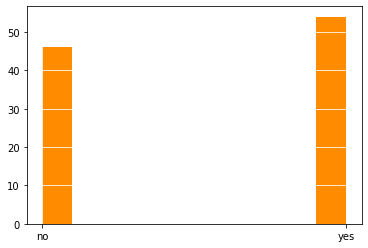

In [15]:
#histogram of converted feature
plt.rc('grid', color='w', linestyle='solid')
df['converted'].hist(color='darkorange')

#####Observations

*   Out of the sample of 100 users, 54 converted to the new page, while 46 users still use the old page.
*   The feature contains 2 levels: 'yes' and 'no'









**Language feature**

In [16]:
#value counts for language preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

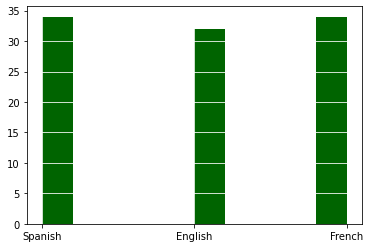

In [17]:
#chart for language preferred feature
plt.rc('grid', color='w')
df['language_preferred'].hist(color='darkgreen')

#####Observations

*   There are three levels in the feature: 'English', 'Spanish', and 'French'.
*   This feature is mostly evenly distributed, with 34 users preferring Spanish, 34 users preferring French, and 32 users preferring English.








**Time Spent on the Page feature**

In [18]:
#time_spent_on_page univariate analysis
round(df['time_spent_on_the_page'].mean(), 2)

5.38

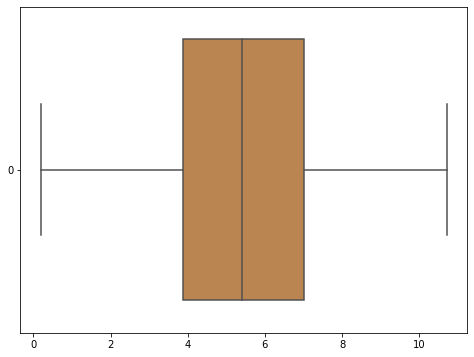

In [19]:
#boxplot for time spent on the landing page
plt.figure(figsize=(8,6))
sns.boxplot(data=df['time_spent_on_the_page'], orient='h', color='peru')
plt.show()

#####Observations

*   The 'time_spent_on_the_page' feature shows a normal distribution, as seen by the box plot.
*   The mean or average time spent on the page is 5.38 minutes.

*   There does not seem to be any outliers present.





**Group feature**

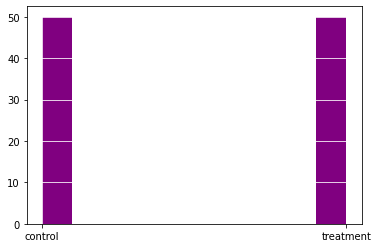

In [20]:
#chart for group feature
plt.rc('lines', color='w')
df['group'].hist(color='purple')
plt.show()

#####Observations

*   As expected, the group variable is evenly distributed, and consists of 2 levels called 'control' and 'treatment'.
*   The control group has 50 users and the treatment group has 50 users.



**Landing Page feature**

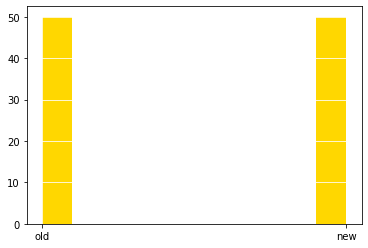

In [21]:
#visualizing landing page feature
plt.rc('grid', color='w')
df['landing_page'].hist(color='gold')

#####Observations

*   There is an even number of users for the old landing page and the new landing page.
*   This make sense as we were told the sample was evenly split between the two pages.



##Bivariate Analysis

**Landing Page and Converted**

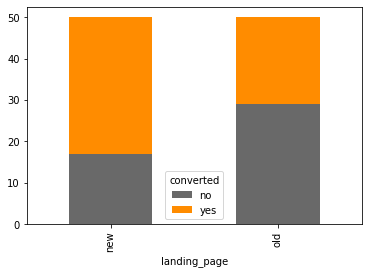

In [22]:
#visualization of landing page and converted
pd.crosstab(df['landing_page'],df['converted']).plot.bar(stacked=True, color=['dimgray', 'darkorange'])
plt.rc('grid', color='w', linestyle='solid')
plt.show()

#####Observations

*   The new landing page had more users who ended up converting compared to the old page




**Preferred Language and Converted features**

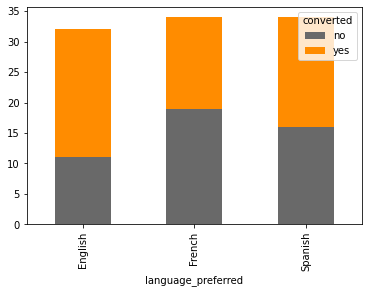

In [23]:
#visualizing language and converted
pd.crosstab(df['language_preferred'], df['converted']).plot.bar(stacked=True, color=['dimgray','darkorange'])
plt.show()

####Observations

*   The preferred language feature is almost evenly distributed.
*   French and Spanish each have 34 users with English having 32.
*   Users who preferred French had the least amount of users that converted to the new page.










**Group, Time Spent on Page, Converted features**

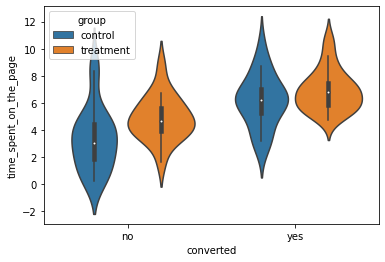

In [24]:
#violin plot for converted, time on page, and group features
sns.violinplot(data=df, x=df['converted'],y=df['time_spent_on_the_page'],hue='group')

In [25]:
#value counts for those who converted in the control and treatment groups
df['converted'].groupby(df['group']).value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: converted, dtype: int64

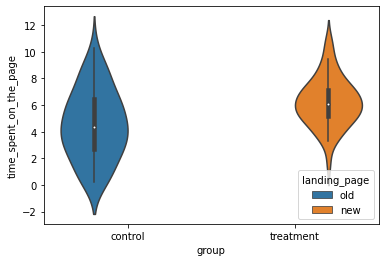

In [26]:
#visualizing group, time on page, and landing page 
sns.violinplot(data=df, x=df['group'],y=df['time_spent_on_the_page'],hue='landing_page')
plt.show()

####Observations

*   It seems that users who visit the new page spend more time on it compared to the old page
*   Users in the treatment group were more likely to convert to the new page
*   It seems as though users enjoyed the new landing page over the old landing page as they spent more time on average compared to the old landing page. 






## 1. Do the users spend more time on the new landing page than the existing landing page?

**Time Spent on the Page and Landing Page features**

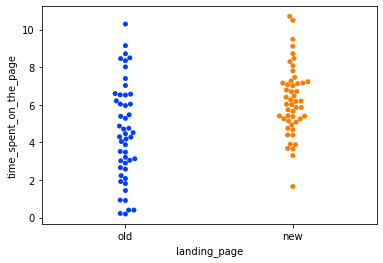

In [27]:
#Plotted this chart with the frist question since the two variables shown are variables being studied
#visualizing time on page and landing page 
sns.set_palette("bright")
plt.rc('grid', color='w', linestyle='solid')
sns.swarmplot(x="landing_page", y="time_spent_on_the_page", data=df)

In [28]:
#mean of time spent on page and new/old landing page
df['time_spent_on_the_page'].groupby(df['landing_page']).mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [29]:
#viewing std deviation of landing page and time spent on page 
df['time_spent_on_the_page'].groupby(df['landing_page']).std()

landing_page
new    1.817031
old    2.581975
Name: time_spent_on_the_page, dtype: float64

###Performing Visual Analysis

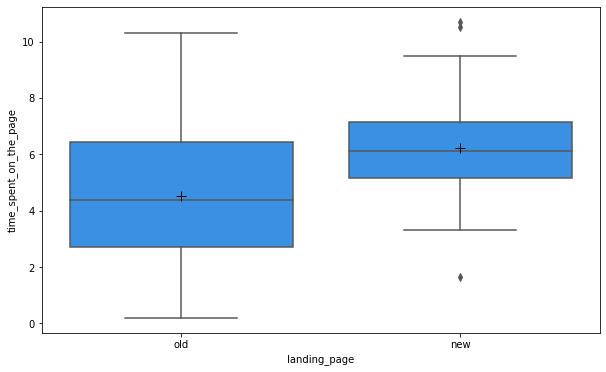

In [30]:
#Charted boxplot in addition to swarm plot for visualization
#boxplot for visualizing variables of problem in question 
plt.rcParams["figure.figsize"] = [10,6]
sns.boxplot(x="landing_page", y='time_spent_on_the_page', data=df, color='dodgerblue', showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

####Observations


*   Based off of the visuals, it appears that users spend more time on the new page compared to the old page.
*   The mean time spent on the old page was 4.53 minutes.
*   The mean time spent on the new page was 6.22, which shows that users tend to spend more time on the new page compared to the old one.
*   There is more variance on time spent on the page for the new site, as there are several outliers present for the new page.
*   2 of the outliers both show the time spent on the page by the user was over 10 minutes, while 1 shows the time spent on the page was less than 2 minutes.
*   There is a higher concentration of users that spent 4 minutes or less on the old page compared to the new.






---







###Defining the null and the alternate hypotheses

Let $\mu_1, \mu_2$ be the mean the new landing page and the old landing page, respectively.

>$H_0:\mu_1=\mu_2$
  
          Users spend equal amount of time on the old and new landing page

>$H_a:\mu_1>\mu_2$
  
          Users spend more time on the new landing page

### Selecting the appropriate test

#####Checking whether the T-test conditions are met

*   The null hypothesis is testing for the equality of 2 means.
*   We have continous data.
*   The sample size is >30 and the population is normally distributed as mentioned earlier.
*   The population standard deviation is unknown.





Based off of the conditions given, the two-independent sample T-test is the appropriate choice for the task at hand.

###Deciding the significance level

We will test at a 0.05 level of significance.

###Collecting and preparing the data

In [31]:
#loading the ab test data 
page_data = pd.read_csv('/content/drive/MyDrive/DSBA Class/Project 2/abtest.csv')

In [32]:
page_data['time_spent_on_the_page'].groupby(df['landing_page']).describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [33]:
#creating new page and old page variables
new_page = page_data[page_data['landing_page'] == 'new']['time_spent_on_the_page']

old_page = page_data[page_data['landing_page'] == 'old']['time_spent_on_the_page']

In [34]:
#checking statistical summary 
new_page.describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [35]:
#checking statistical summary
old_page.describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

In [36]:
print("the mean time for the new landing page is " + str(round(new_page.mean(), 4)))
print("the mean time for the old landing page is " + str(round(old_page.mean(), 4)))
print("the standard deviation of the new_page is " + str(round(new_page.std(), 4)))
print("the standard deviation of the old page is " + str(round(old_page.std(), 4)))

the mean time for the new landing page is 6.2232
the mean time for the old landing page is 4.5324
the standard deviation of the new_page is 1.817
the standard deviation of the old page is 2.582


###Calculating the p-value

In [37]:
#importing modules and calculating p-value
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_page, old_page, equal_var=False, alternative='greater')
print("The p-value is ", p_value)

The p-value is  0.0001392381225166549


###Comparing the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


###Inference from results



*   With the p-value being less than the level of significance, we can reject the null hypothesis as we have enough statistical significance to conclude that an increase in time spent on the page is not independent from the new landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Visual Analysis

In [39]:
#viewing data 
page_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Text(0.5, 1.0, 'Converted users from new and old page')

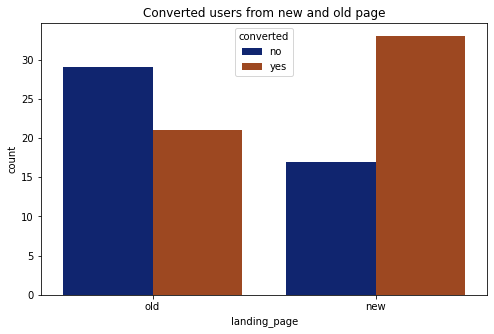

In [40]:
#visualizing the data in question 
plt.figure(figsize=(8,5))
sns.countplot(x='landing_page', hue='converted',data=page_data, palette='dark')
plt.title("Converted users from new and old page")

###Defining the Null and Alternative Hypothesis

>$H_0:p1=p2$

    The conversion rates, which is the proportion of users who visit the landing page and get converted, for the old page and the new page are equal

>$H_a:p1>\ p2$

    The conversion rate for the new page is greater than the conversion rate of the old page

###Selecting the appropriate test



*   Based off of the hypotheses, the question is referring to proportions.Proportions are used to analyze the hypotheses and to draw cocnlusions; therefore, the proportion Z test is the appropriate test in this situation.

###Defining the significance level

A signicance level of 0.05 will be used

###Collecting and preparing the data

In [41]:
#viewing first 5 rows of data
page_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


finding the number of converted users in each group

In [42]:
# number of converted users in the new group
converted_new = page_data[page_data['converted'] == 'yes'].landing_page.value_counts()['new']
converted_new

33

In [43]:
# number of converted users in the old group
converted_old = page_data[page_data['converted'] == 'yes'].landing_page.value_counts()['old']
converted_old

21

In [44]:
#displaying the number of new and old converted users and total number of new and old users
print("The number of new and old converted users are {0} and {1} ".format(converted_new, converted_old))

n_users_new = df.landing_page.value_counts()['new']
n_users_old = df.landing_page.value_counts()['old']

print('The number of users from the new and the old landing page is {0} and {1} '.format(n_users_new, n_users_old))

The number of new and old converted users are 33 and 21 
The number of users from the new and the old landing page is 50 and 50 


In [45]:
print(f' The proportions of converted users from the new landing page and the old landing page are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converted users from the new landing page and the old landing page are 0.66, 0.42 respectively


###Calculating the p-value

In [46]:
#calculating the p-value using the proportion z-test
stat, pval = proportions_ztest([converted_new, converted_old], [n_users_new, n_users_old], alternative="larger")

#print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


###Comparing the p-value with $\alpha$

In [47]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'Since the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


###Inference from results


*   Since the p-value is less than the level of significance, we reject the null hypothesis as we have enough statistical significance to conclude that the conversion rate for the new landing page is greater than that of the old landing page.

## 3. Is the conversion and preferred language independent or related?

In [48]:
#examine the data
page_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


###Performing visual analysis

As previously shown in the bivariate analysis, we will create a stacked barplot to compare the two variables.

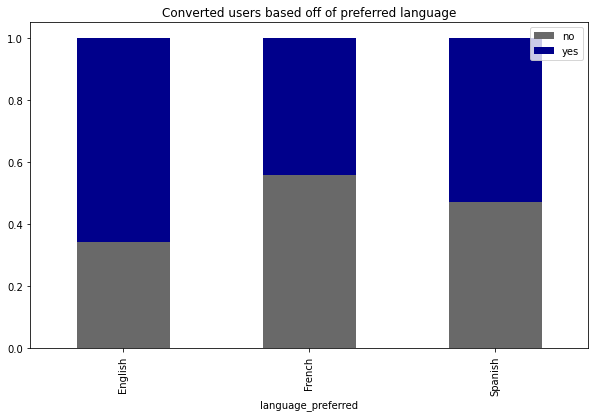

In [49]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(page_data['language_preferred'],page_data['converted'],normalize='index').plot(kind='bar',stacked =True, color=['dimgray', 'darkblue'])
plt.legend()
plt.title("Converted users based off of preferred language")
plt.show()

It is apparent that most of the users who preferred English language, converted to the new page.  Spanish preferred users appear to be split evenly between the old and new page, while the majority of the French preferred users favored the old page.  

###Defining the null and alternative hypotheses

>$H_0:$  Conversion is independent of preferred language.


>$H_a:$  Conversion is dependent on preferred language.



###Selecting the appropriate test



*   The hypotheses can be tested using Chi-square test of independence of attributes, as both variables are categorical variables, converted (yes and no) and language preferred (English, French, and Spanish).
 



###Deciding the significance level


*   A significance level of 0.05 will be used.




###Collecting and Preparing the Data



*   Since a Chi-sqaure test of independence of attributes is being utilized, a contingency table should be developed.




In [50]:
#Creating contingency table for the 2 variables in question
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18




*   A 3x2 contingency table has been created with the two variables.  It consists of 3 rows for the language_preferred variable and 2 columns for the converted variables 




###Calculate the p-value

In [51]:
#Using the chi-square function to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.2129888748754345


###Comparing the p-value with $\alpha$

In [52]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'Since the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


###Inference from results



*   Since the p-value is greater than the level of significance, we fail to reject the null hypothesis and cannot conclude that conversion is dependent on preferred language.




## 4. Is the time spent on the new page same for the different language users?

###Collecting and filtering the data in question

In [53]:
#Before visualizing data, group data by new page users 
page_data_new = page_data[page_data['landing_page'] == 'new']

#sorting totals of new page users by language 
page_data_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [54]:
#calculating means for each language
English_mean = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].mean()['English']
Spanish_mean = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].mean()['Spanish']
French_mean = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].mean()['French']

In [55]:
print('The mean time spent on the new page for users who prefer English is ', round(English_mean, 2))
print('The mean time spent on the new page for users who prefer Spanish is ', round(Spanish_mean, 2))
print('The mean time spent on the new page for users who prefer French is ', round(French_mean, 2))

The mean time spent on the new page for users who prefer English is  6.66
The mean time spent on the new page for users who prefer Spanish is  5.84
The mean time spent on the new page for users who prefer French is  6.2


In [56]:
#calculating the standard deviation for each language 
English_std = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].std()['English']
Spanish_std = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].std()['Spanish']
French_std = page_data_new.groupby(page_data_new['language_preferred'])['time_spent_on_the_page'].std()['French']

In [57]:
print('The standard deviation for time spent on the page by users who prefer English is ', round(English_std, 2))
print('The standard deviation for time spent on the page by users who prefer Spanish is ', round(Spanish_std, 2))
print('The standard deviation for time spent on the page by users who prefer French is ', round(French_std, 2))

The standard deviation for time spent on the page by users who prefer English is  1.98
The standard deviation for time spent on the page by users who prefer Spanish is  1.53
The standard deviation for time spent on the page by users who prefer French is  1.93


###Visualizing the data and calculating means and standard deviations


*   Creating a box plot to see if there is any evidence that language has an effect on time spent on the new page




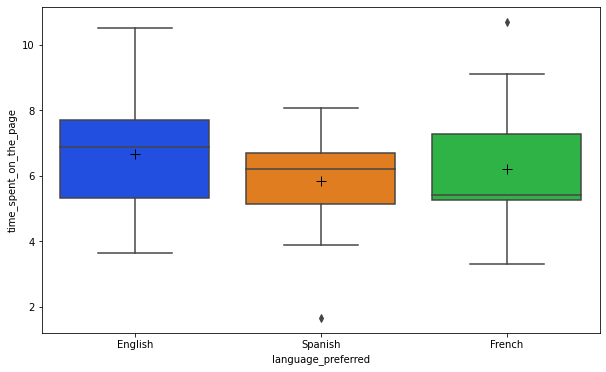

In [58]:
sns.boxplot(data=page_data_new, x=page_data_new['language_preferred'], y=page_data_new['time_spent_on_the_page'],palette="bright",showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})



*   For the Spanish preferred users, there appears to be one outlier with a user spending a little less than 2 minutes on the page

*   For French preferred users, there appears to be one outlier for a user who spent over 10 minutes on the page.

*   Visually it does not appear to be a relationship between the two variables, time spent on the page and language.




###Selecting the appropriate test

*   Since we are comparing the means of 3 groups, the appropriate test needed to test the hypotheses is the ANOVA one-way test.



###Defining the null and alternative hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for each language

*   >$H_0:   \mu_1 = \mu_2 = \mu_3$


*   >$H_a:$  At least one language has a different time spent on the new page



**The normality and equality of variance assumptions must be checked first before performing the ANOVA one-way test.**

For normality, we will use the Shapiro-Wilk's test

####**Shapiro-Wilks Test**

 >$H_0:$  Time spent on the page by the users follows a normal distribution. 

  >$H_a:$  Time spent on the page doesn't follow a normal distribution.

#####Level of Significance

*   A 0.05 level of significance will be used




#####Calculating the p-value

In [59]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, pval = stats.shapiro(page_data['time_spent_on_the_page']) 
print('The p-value is', pval)

The p-value is 0.5643684267997742


#####Comparing the p-value with $\alpha$

In [60]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'Since the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.5643684267997742 is greater than the level of significance, we fail to reject the null hypothesis.


#####Inference

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.  We do not have enough statistical evidence to conclude that time spent on the page follows a normal distribution.

For homgenity of variance, we use the Levine test

###**Levine's Test**

 >$H_0:$  All population variances are equal against alternative hypothesis. 

  >$H_a:$  At least one variance is different from the other 2 

#####Level of Significance

*   A 0.05 level of significance will be used




#####Calculating the p-value

In [61]:
# Assumption 1: Homogenity of Variance
# import the required function
from scipy.stats import levene

# find the p-value
statistic, pval = levene(page_data[page_data['language_preferred'] == 'English']['time_spent_on_the_page'],page_data[page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page'],page_data[page_data['language_preferred'] == 'French']['time_spent_on_the_page'])

In [62]:
print(pval)

0.06515086840327314


#####Comparing the p-value with $\alpha$

In [63]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'Since the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.06515086840327314 is greater than the level of significance, we fail to reject the null hypothesis.


#####Inference

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis for homogenity of variances.

###Now, we can use the one-way ANOVA test for the original null and alternative hypotheses stated at the beginning of the question

In [64]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(page_data.loc[page_data['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              page_data.loc[page_data['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              page_data.loc[page_data['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


###Comparing the p-value with $\alpha$

In [65]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


###Inference from results



*   Since the p-value is greater than the level of significance, we fail to reject the null hypothesis as we have enough statistical evidence to say that there isn't a difference in time spent on the page among the three languages. 




## Conclusion and Business Recommendations

###Conclusions

*   There is enough statistical evidence to conclude that time spent on the page is not independent of the new landing page.  
*   Users tend to spend more time on the new page; in addition, the mean time spent for the new page is longer among users at 6.22 minutes compared to just 4.53 minutes for the old page.
*   There is also enough statistical evidence to conclude that the conversion rate is higher among users who used the new page.
*   Conversion rate and preferred language appear to be independent of each other.

*   The mean time spent on either page was 5.38 minutes.






###Recommendations

*   It is apparent that the new page has a more positive influence on users, and the company should consider moving strictly to the new landing page.  
*   Moving to the new page will also increase a user's time spent on the company's website, leading to more exposure for the company.
*   More exposure through longer viewership times could also open up oppurtunities for acquiring advertisement partnerships with other companies.  This could help increase revenue for E-news.




___

In [68]:
%%shell
jupyter nbconvert --to html ///WalterEfird_Project2_FullCode.ipynb

[NbConvertApp] Converting notebook ///WalterEfird_Project2_FullCode.ipynb to html
[NbConvertApp] Writing 597171 bytes to ///WalterEfird_Project2_FullCode.html
